Dataset Shape: (6362620, 11)

Training completed in 168.96 seconds

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.98      0.78      0.87      1643

    accuracy                           1.00   1272524
   macro avg       0.99      0.89      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524


Confusion Matrix:

[[1270858      23]
 [    368    1275]]


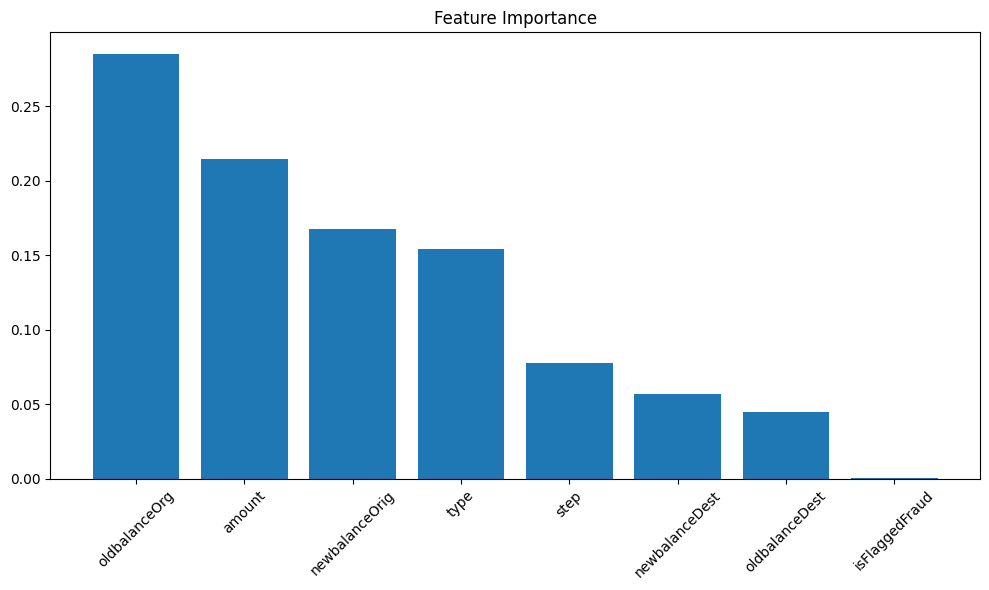

Model Training Finished Successfully ✅


In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import time

# ======================================
# 1️⃣ Load FULL dataset (more than 63 lakh rows)
# ======================================
# low_memory=False avoids dtype warnings
data = pd.read_csv("C:/Users/DELL/Desktop/Fraud.csv", low_memory=False)

print("Dataset Shape:", data.shape)

# ======================================
# 2️⃣ Reduce Memory Usage (Important)
# ======================================
# Converting to smaller data types reduces RAM usage
# and speeds up training

data['step'] = data['step'].astype('int32')
data['amount'] = data['amount'].astype('float32')
data['oldbalanceOrg'] = data['oldbalanceOrg'].astype('float32')
data['newbalanceOrig'] = data['newbalanceOrig'].astype('float32')
data['oldbalanceDest'] = data['oldbalanceDest'].astype('float32')
data['newbalanceDest'] = data['newbalanceDest'].astype('float32')

# ======================================
# 3️⃣ Encode Categorical Column
# ======================================
# Convert transaction types (PAYMENT, TRANSFER, etc.)
# into numeric format for model

le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])

# ======================================
# 4️⃣ Remove Unnecessary Columns
# ======================================
# Account IDs do not help prediction
# and increase training time

data = data.drop(['nameOrig', 'nameDest'], axis=1)

# ======================================
# 5️⃣ Split Features and Target
# ======================================
X = data.drop('isFraud', axis=1)
y = data['isFraud']

# ======================================
# 6️⃣ Train-Test Split
# ======================================
# stratify=y keeps fraud ratio same in both sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# ======================================
# 7️⃣ Train Random Forest (Faster Version)
# ======================================

model = RandomForestClassifier(
    n_estimators=50,
    # WHY 50?
    # Each tree increases training time.
    # With 10 lakh rows, 100 trees takes much longer.
    # 50 trees gives good performance while reducing time by ~40-50%.

    random_state=42,

    class_weight='balanced',
    # Fraud dataset is highly imbalanced.
    # This makes the model pay more attention to fraud class.

    n_jobs=-1
    # Uses all CPU cores.
    # Makes training much faster.
)

start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

print(f"\nTraining completed in {end_time - start_time:.2f} seconds")

# ======================================
# 8️⃣ Prediction
# ======================================
y_pred = model.predict(X_test)

# ======================================
# 9️⃣ Evaluation
# ======================================
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

# ======================================
# 🔟 Feature Importance
# ======================================
importances = model.feature_importances_
features = X.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()

print("Model Training Finished Successfully ✅")


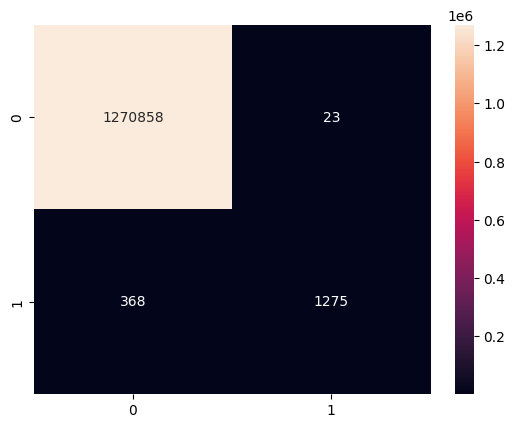

In [3]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.savefig("confusion_matrix.png")
